# Schaetzen der stat. Dichte eines Subsystems

## Das System

In [365]:
using Revise, Plots, Interact, LinearAlgebra
using EAMC
using Arpack

In [379]:
# Berechne Generator vom Bickleyjet auf mittelcoarsem Grid

bj=EAMC.BickleyJet(nx=30, ny=10)
nx = bj.nx
ny = bj.ny
n  = nx * ny
T = 0.3
Q = EAMC.generator(0, bj) * T

300×300 SparseArrays.SparseMatrixCSC{Float64,Int64} with 870 stored entries:
  [1  ,   1]  =  -0.482555
  [30 ,   1]  =  0.646095
  [31 ,   1]  =  0.0771994
  [1  ,   2]  =  0.482555
  [2  ,   2]  =  -0.201728
  [32 ,   2]  =  0.132322
  [2  ,   3]  =  0.201728
  [3  ,   3]  =  -0.153799
  [33 ,   3]  =  0.0219075
  [3  ,   4]  =  0.153799
  [4  ,   4]  =  -0.473488
  [4  ,   5]  =  0.370484
  ⋮
  [295, 296]  =  0.203876
  [296, 296]  =  -0.459216
  [296, 297]  =  0.377437
  [297, 297]  =  -0.697126
  [268, 298]  =  0.0219075
  [297, 298]  =  0.594122
  [298, 298]  =  -0.546193
  [269, 299]  =  0.132322
  [298, 299]  =  0.546193
  [299, 299]  =  -0.265366
  [270, 300]  =  0.0771994
  [299, 300]  =  0.265366
  [300, 300]  =  -0.101825

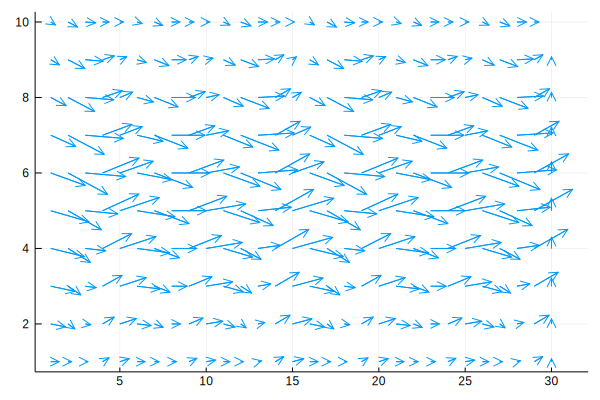

In [464]:
# Plot des Generators / der Velocity
function extractquiver(dt)
    xs = []
    ys = []
    dxs = []
    dys = []
    nx = size(dt,1)
    ny = size(dt, 2)
    for x = 1:nx, y=1:ny
        push!(xs, x)
        push!(ys, y)
        dx = 0
        dy = 0
        x < nx && (dx += dt[x,y,x+1,y])
        x > 1  && (dx -= dt[x,y,x-1,y])
        y < ny && (dy += dt[x,y,x,y+1])
        y > 1  && (dy -= dt[x,y,x,y-1])
        push!(dxs, dx)
        push!(dys, dy)
    end
    xs, ys, dxs, dys
end

xs, ys, dxs, dys = extractquiver(reshape(Q, nx, ny, nx, ny))
quiver(xs, ys,quiver=(dxs,dys))

In [381]:
# Transferoperator
T = exp(Q |> collect)

300×300 Array{Float64,2}:
 0.617205     0.343861     0.0369049    …  5.19331e-42  1.86406e-43
 3.68568e-41  0.817318     0.168891        4.00415e-40  1.36086e-41
 6.13489e-39  2.06445e-39  0.857445        6.88527e-38  2.49005e-39
 1.28979e-36  4.54468e-37  3.8024e-39      1.48739e-35  5.60615e-37
 9.1918e-36   3.01906e-36  2.62802e-38     5.68667e-35  2.21834e-36
 5.54389e-36  1.23133e-36  1.106e-38    …  6.17291e-36  2.48439e-37
 3.4495e-34   8.1119e-35   7.53623e-37     4.13033e-34  1.71874e-35
 3.48015e-32  8.67962e-33  8.35055e-35     4.48399e-32  1.93214e-33
 3.38483e-30  8.96611e-31  8.94446e-33     4.69374e-30  2.09728e-31
 1.92704e-29  3.24855e-30  3.35715e-32     4.51422e-30  2.10022e-31
 2.19149e-28  1.9572e-29   2.06778e-31  …  6.30769e-30  3.04701e-31
 1.26307e-26  1.24755e-27  1.37779e-29     4.36216e-28  2.19343e-29
 1.6595e-24   1.82159e-25  2.10731e-27     6.90697e-26  3.62314e-27
 ⋮                                      ⋱                          
 6.84691e-25  1.01209e

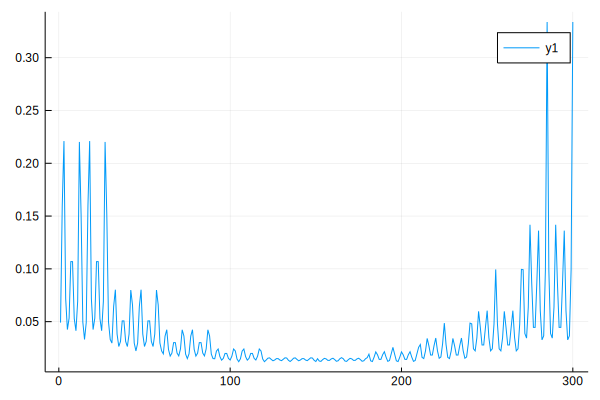

In [382]:
# Stationaere Dichte des ganzen Systems
# die Raender links und rechts liegen in der x-y-Ebene oben und unten
plot(eigs(T', nev=1, which=:LM)[2] |> real |> vec .|> abs)

## Das Subsystem
Wir betrachten jetzt nur einen Teil der Transferoperators

In [383]:
# Transferoperator im mittleren Viereck
cutoffx = 4 # links/rechts zu entfernende zellen
cutoffy = 2 # oben/unten ~

TT = reshape(T, nx, ny, nx, ny)
cutx = cutoffx+1:nx-cutoffx
cuty = cutoffy+1:ny-cutoffy
ncut = length(cutx) * length(cuty)
TT = TT[cutx, cuty, cutx, cuty]
TT = reshape(TT, ncut, ncut)

132×132 Array{Float64,2}:
 0.172714     0.317915     0.254033     …  1.23995e-21  3.65001e-23
 7.92069e-31  0.245852     0.390927        2.31648e-21  7.05811e-23
 1.80894e-29  1.64956e-30  0.34796         4.0825e-20   1.29817e-21
 5.84353e-28  5.54239e-29  6.01811e-30     1.00216e-18  3.33461e-20
 1.81266e-26  1.79065e-27  2.02451e-28     2.32658e-17  8.12251e-19
 1.92292e-25  1.75137e-26  1.82644e-27  …  6.6537e-17   2.4289e-18 
 2.27327e-24  1.93271e-25  1.85651e-26     2.58255e-16  9.86193e-18
 4.97694e-23  4.4447e-24   4.4885e-25      4.20444e-15  1.69511e-16
 1.84033e-21  1.73121e-22  1.84268e-23     1.12779e-13  4.82386e-15
 5.11481e-20  4.94314e-21  5.38123e-22     1.85958e-12  8.47531e-14
 5.78536e-19  5.07656e-20  4.71522e-21  …  3.09179e-12  1.49568e-13
 5.66753e-18  4.65209e-19  3.62893e-20     2.78827e-12  1.41651e-13
 7.9294e-17   6.87758e-18  5.69247e-19     2.77136e-11  1.51233e-12
 ⋮                                      ⋱  ⋮                       
 1.53477e-22  2.9321e-

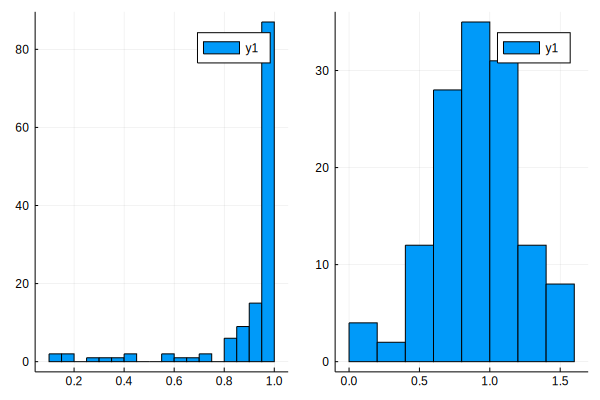

In [384]:
# histogramme der zeilen und spaltensummen
plot(histogram(sum(TT, dims=2)), histogram(sum(TT, dims=1)'), layout=(1,2))

und erweitern es um den auesseren Zustand.

- Dazu setzen wir die Zeilensumm auf 1 (alle nicht beobachteten Transitions gehen aus dem System raus).
- Die Spaltensummen ergaenzen wir ggf auf 1.

Heuristisch ist letzteres zu rechtfertigen wenn man beachtet dass sie im inkompressiblen Fall 1 waere.
Jetzt sorgen wir dafuer, dass Zellen die nicht genug inflow haben den aus dem aeusseren System bekommen,
Zellen die bereits genug zuviel inflow haben geben wir nichts aus der Umwelt.

In [433]:
# berechnung der grossen matrix
A = zeros(ncut+1,ncut+1)
A[1:ncut, 1:ncut] = TT
A[1:ncut, ncut+1] = 1 .- sum(TT, dims=2)
A[ncut+1, 1:ncut] = max.(1 .- sum(TT, dims=1), 0)
A[ncut+1, :]    ./= sum(A[ncut+1,:])
A

133×133 Array{Float64,2}:
 0.172714     0.317915     0.254033     …  3.65001e-23  0.040546  
 7.92069e-31  0.245852     0.390927        7.05811e-23  0.087533  
 1.80894e-29  1.64956e-30  0.34796         1.29817e-21  0.0975064 
 5.84353e-28  5.54239e-29  6.01811e-30     3.33461e-20  0.00497476
 1.81266e-26  1.79065e-27  2.02451e-28     8.12251e-19  0.0228347 
 1.92292e-25  1.75137e-26  1.82644e-27  …  2.4289e-18   0.0655635 
 2.27327e-24  1.93271e-25  1.85651e-26     9.86193e-18  0.133752  
 4.97694e-23  4.4447e-24   4.4885e-25      1.69511e-16  0.123925  
 1.84033e-21  1.73121e-22  1.84268e-23     4.82386e-15  0.00479919
 5.11481e-20  4.94314e-21  5.38123e-22     8.47531e-14  0.0261846 
 5.78536e-19  5.07656e-20  4.71522e-21  …  1.49568e-13  0.0748716 
 5.66753e-18  4.65209e-19  3.62893e-20     1.41651e-13  0.14617   
 7.9294e-17   6.87758e-18  5.69247e-19     1.51233e-12  0.156784  
 ⋮                                      ⋱                         
 7.12746e-21  1.41456e-21  3.83632e-

## Vergleich der Stationeren dichten
des erweiterten subsystems(blau) und der einschraekung der stat. dichte des ganzen systems

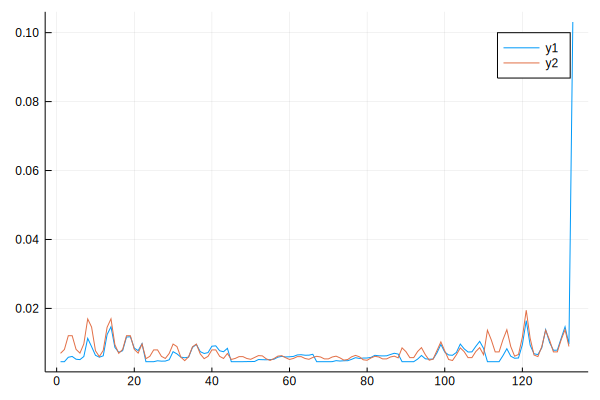

In [434]:
ev = eigs(A', nev=1)[2]|>real|>vec
ev ./= sum(ev)
plot(ev)

evcut = eigs(T', nev=1)[2]|>real
evcut = reshape(evcut, nx, ny)[cutx, cuty] |> vec
evcut ./= sum(evcut)
plot!(evcut)

In [435]:
P = A[1:ncut, 1:ncut]
Pm = [P[i,j] * ev[i] / ev[j] for j=1:size(P,2), i=1:size(P,1)]

132×132 Array{Float64,2}:
 0.172714     7.9207e-31   2.31922e-29  …  1.78518e-12  2.19353e-11
 0.317915     0.245852     2.11488e-30     6.01148e-13  7.84188e-12
 0.19814      0.304914     0.34796         2.28891e-13  3.17685e-12
 0.0646246    0.14722      0.325684        1.16844e-14  1.73064e-13
 0.015716     0.0454515    0.139513        6.49996e-16  1.0209e-14 
 0.00404686   0.0142136    0.0562022    …  4.47817e-17  7.43225e-16
 0.000897679  0.00373081   0.0183776       2.62515e-17  4.55319e-16
 8.36834e-5   0.000403634  0.00240774      3.41483e-18  6.22675e-17
 8.81183e-6   4.86151e-5   0.000339315     1.25294e-19  2.40077e-18
 9.55502e-7   5.86767e-6   4.62514e-5      5.42915e-21  1.08845e-19
 1.35936e-7   9.18666e-7   8.06311e-6   …  3.29435e-22  6.89414e-21
 2.05394e-8   1.49918e-7   1.45912e-6      1.64743e-22  3.57149e-21
 1.28484e-9   9.95004e-9   1.06946e-7      2.51498e-23  5.67274e-22
 ⋮                                      ⋱  ⋮                       
 2.46251e-12  2.31774e

In [436]:
# zeilensumme vom Pm kleiner 1
all(sum(Pm, dims=2) .< 1 + 1e-6)

true

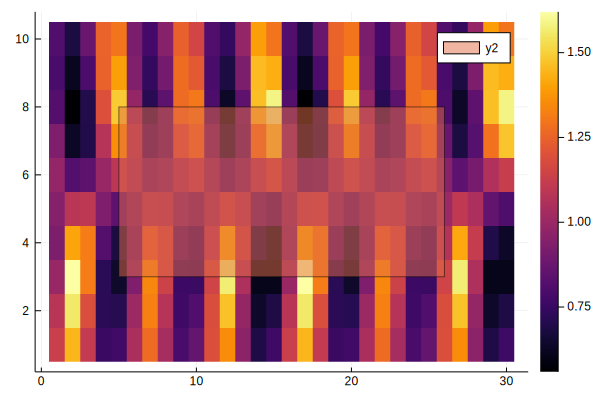

In [437]:
heatmap(reshape(sum(T, dims=1), nx, ny)')

x1, x2 = extrema(cutx)
y1, y2 = extrema(cuty)
plot!(Shape([x1, x2, x2, x1], [y1,y1,y2,y2]), opacity=.5)

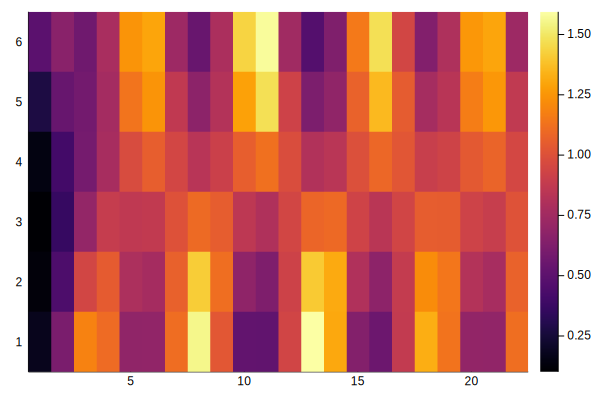

In [438]:
heatmap(reshape(sum(TT, dims=1), length(cutx), length(cuty))' )

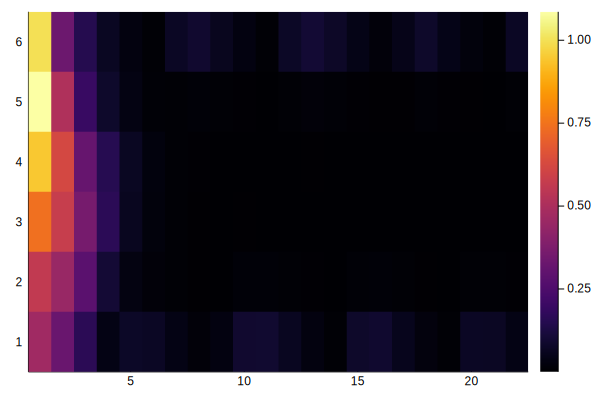

In [460]:
heatmap(-(reshape(sum(TT, dims=1), length(cutx), length(cuty)) -  
        
reshape(sum(T, dims=1), nx, ny)[cutx, cuty])')

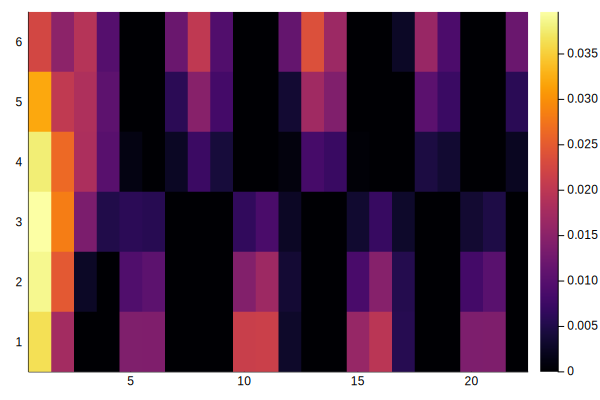

In [447]:
reshape(A[end, 1:ncut], length(cutx), length(cuty))' |> heatmap